# CZ1016 : Assignment

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from collections import Counter
sb.set() # set the default Seaborn style for graphics
import nltk
from nltk.corpus import stopwords
import string
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from nltk.stem.snowball import SnowballStemmer

---

### Setup : Import the Dataset

Dataset : **"smsdata.txt"** (use `read_table` function from Pandas to import)     
After importing, take a quick look at the dataset using the `head` function.

In [2]:
# Read the dataset as per the format
# response label <tab> sms as string
smsData = pd.read_table('smsdata.txt', sep = "\t", header = None)
smsData.head()

,0,1
0,good,"Go until jurong point, crazy.. Available only ..."
1,good,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,good,U dun say so early hor... U c already then say...
4,good,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Fix the headers / column labels
smsData.columns = ["label", "text"]
smsData.head()

,label,text
0,good,"Go until jurong point, crazy.. Available only ..."
1,good,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,good,U dun say so early hor... U c already then say...
4,good,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Basic information about the data
smsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
text     5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


## Data Interpretation

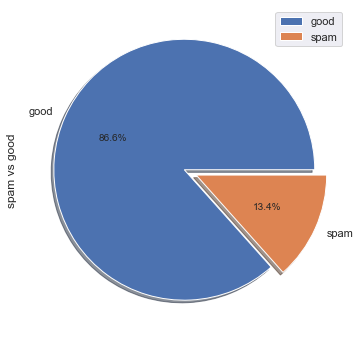

In [5]:
smsData["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("spam vs good")
plt.legend(["good", "spam"])
plt.show()

Not an even distribution of spam and good data may affect the probability of identitfying a spam if the predictors are not distintictive to differentiate the data

## spam and good messages

In [6]:
spam = smsData[smsData['label']=='spam']
spam

,label,text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [7]:
good = smsData[smsData['label']=='good']
good

,label,text
0,good,"Go until jurong point, crazy.. Available only ..."
1,good,Ok lar... Joking wif u oni...
3,good,U dun say so early hor... U c already then say...
4,good,"Nah I don't think he goes to usf, he lives aro..."
6,good,Even my brother is not like to speak with me. ...
...,...,...
5565,good,Huh y lei...
5568,good,Will Ã¼ b going to esplanade fr home?
5569,good,"Pity, * was in mood for that. So...any other s..."
5570,good,The guy did some bitching but I acted like i'd...


In [8]:
common_good = Counter(" ".join(smsData[smsData['label']=='good']["text"]).split()).most_common(20)
most_common_good = pd.DataFrame.from_dict(common_good)
most_common_good = most_common_good.rename(columns={0: "good_words", 1 : "freq"})

most_common_good

,good_words,freq
0,to,1538
1,you,1462
2,I,1439
3,the,1029
4,a,977
5,i,742
6,and,739
7,in,736
8,u,651
9,is,645


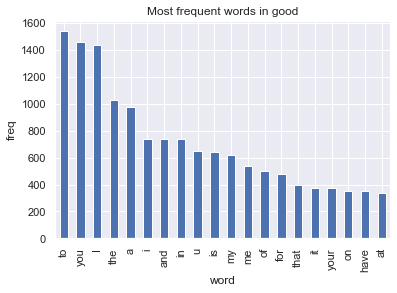

In [9]:
most_common_good.plot.bar(legend = False)
y_pos = np.arange(len(most_common_good["good_words"]))
plt.xticks(y_pos, most_common_good["good_words"])
plt.title('Most frequent words in good')
plt.xlabel('word')
plt.ylabel('freq')
plt.show()



In [10]:
common_spam = Counter(" ".join(smsData[smsData['label']=='spam']["text"]).split()).most_common(20)
most_common_spam = pd.DataFrame.from_dict(common_spam)
most_common_spam = most_common_spam.rename(columns={0: "spam_words", 1 : "freq"})

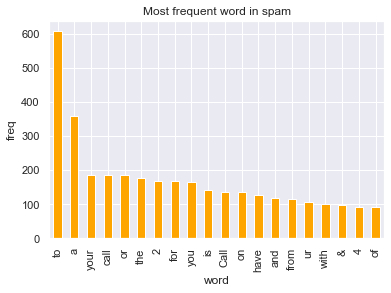

In [11]:
most_common_spam.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(most_common_spam["spam_words"]))
plt.xticks(y_pos, most_common_spam["spam_words"])
plt.title('Most frequent word in spam')
plt.xlabel('word')
plt.ylabel('freq')
plt.show()


#### Comments
The most common word in both spam and good is almost the same, my impression would be spam will have a high frequency of
'weird' characters like e.g $አችል. But it is not represented her in the most frequent spam words
So i would not consider the top few most frequent words to distinguish between good and spam.

---

## Solution : Classification

Use the labeled (`good`/`spam`) text messages in `smsData` to build a tree-based binary classifier that is capable of distinguishing `spam` text messages from the `good` ones. You may build a single decision tree or an ensemble (forest), whichever is better in this case. Try both, and find out which one is better.        

# Data Cleaning

In [12]:
smsData['label'] = smsData['label'].astype('category')
smsData.dtypes # covert into categorical data for decision tree later on

label    category
text       object
dtype: object

In [13]:
smsData.shape

(5572, 2)

In [14]:
#remove duplicates
smsData.drop_duplicates(inplace =True)
smsData.shape
#about 414 duplicated data

(5158, 2)

In [15]:
smsData= smsData.reset_index(drop=True)

In [16]:
#Check for missing data
smsData.isnull().sum()
# no missing data we are set :)
len(smsData)

5158

## Stemming 
Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes.

## Lemmatisation
Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma. 


### Difference between Lemming and Stemming

Lemmatisation is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.

For instance:

The word "better" has "good" as its lemma. This link is missed by stemming, as it requires a dictionary look-up.

The word "walk" is the base form for word "walking", and hence this is matched in both stemming and lemmatisation.

The word "meeting" can be either the base form of a noun or a form of a verb ("to meet") depending on the context, e.g., "in our last meeting" or "We are meeting again tomorrow". Unlike stemming, lemmatisation can in principle select the appropriate lemma depending on the context.


In [17]:

def process_text(text):
    text = text.lower()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    stemmer = SnowballStemmer('english')
    char_length = []
    word_length = []
    
    #place number of char in the text for consideration
    
    lem_text = lemmatizer.lemmatize(text, pos = 'v')
    stem_text = stemmer.stem(lem_text)
    
    drop_punc = [char for char in stem_text if char not in string.punctuation]
    drop_punc = ''.join(drop_punc)
    clean_text = [word for word in drop_punc.split() if word not in stopwords.words('english')]
    #
    return clean_text

In [18]:
#smsData['text'].apply(process_text)

## CountVectorizer

The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

It split the messages into list of zeros and frequency of the word.
e.g 
"hi " = [1,0,0,0,0,0,....0] <- the first index represents frequency of "hi" for the specific messsage, the rest of the zeros represents the frequency of other words found in the entire sets

" hi hi  whatsup" = [2,0,0,0,0,0,..1..,0].



In [19]:
#convert a collection of text to a matrix of tokens
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(min_df=0., max_df=1., analyzer = process_text, ngram_range = (1, 5))
text_count = count.fit_transform(smsData['text'])

## Decision Tree

In [20]:
def prob(y,pred):

    tn, fp, fn, tp = confusion_matrix(y, pred).ravel()
    tnr = tn/(tn+fp)
    tpr = tp/(fn+tp)
    fnr = fn/(fn+tp)
    fpr = fp/(tn+fp)

    print("true negative rate = ",tnr)
    print("false positive rate = ",fpr)
    print("false negative rate = ",fnr)
    print("true positive rate = ",tpr)
    
    return [[round(tnr, 4),round(fpr,4),round(fnr,4),round(tpr,4)]]

In [21]:
def tree2():
    global X_train
    global X_test
    global y_train
    global y_test
    
    dectree = DecisionTreeClassifier(max_depth = 4)
    dectree.fit(X_train, y_train)
    pred1 = dectree.predict(X_train)
    train_accuracy = dectree.score(X_train, y_train)
    print("Train Accuracy: ",train_accuracy)
    rate_list_train = prob(y_train,pred1)
    print()
    
    
    dectree.fit(X_test, y_test)
    pred2 = dectree.predict(X_test)
    test_accuracy = dectree.score(X_test, y_test)
    print("Test Accuracy: ",test_accuracy)
    pred2 = dectree.predict(X_test)
    rate_list_test = prob(y_test,pred2)
    print()
    
    f,axes = plt.subplots(1,2, figsize = (20,10))
    sb.heatmap(confusion_matrix(y_train,pred1), annot = True, fmt = '.0f',annot_kws ={"size":12},ax = axes[0])
    sb.heatmap(confusion_matrix(y_test,pred2), annot = True, fmt = '.0f',annot_kws ={"size":12},ax = axes[1])
    
    return round(train_accuracy,4), rate_list_train, round(test_accuracy,4), rate_list_test
    

### True Negative rate 

Probability of classifying a 'good' text as 'good'.

### False Positive rate

Probability of classifying a 'good' text as 'spam'.

### False Negative rate

Probability of classifying a 'spam' text as 'good'.

### True Positive rate

Probability of classifying a 'spam' text as 'spam'

### Accuracy

Train Accuracy:  0.9270479883664566
true negative rate =  0.9859232680099366
false positive rate =  0.014076731990063483
false negative rate =  0.4970178926441352
true positive rate =  0.5029821073558648

Test Accuracy:  0.9312015503875969
true negative rate =  0.9563269876819709
false positive rate =  0.043673012318029114
false negative rate =  0.2302158273381295
true positive rate =  0.7697841726618705



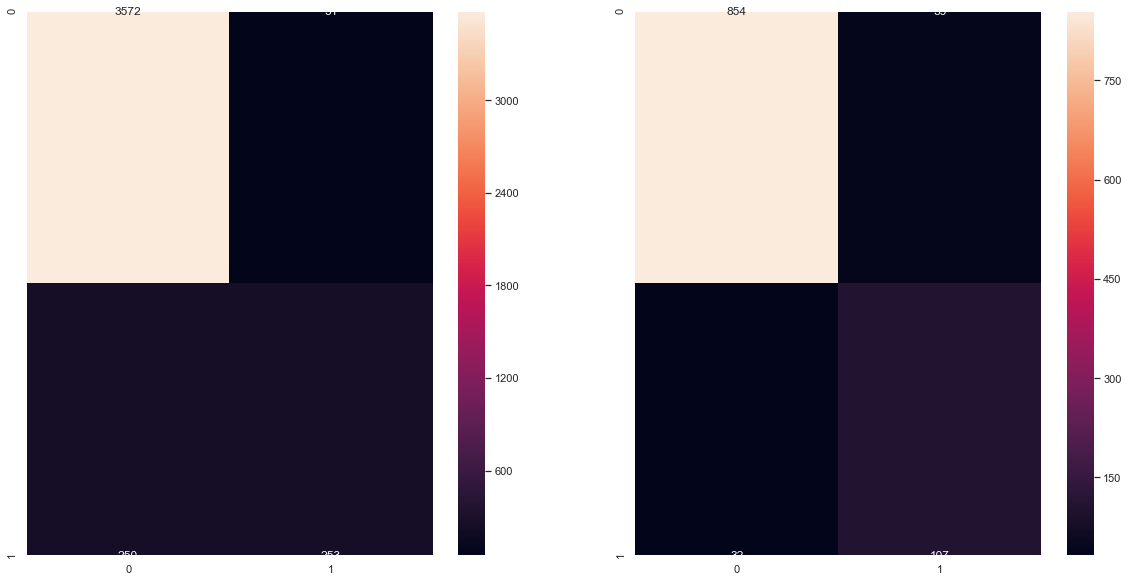

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_count, smsData['label'], test_size = 0.20, random_state =0)
train_acc, train_rates,test_acc,test_rates = tree2()
data1 = [train_acc, train_rates,test_acc,test_rates]

matrix = pd.DataFrame(data = {'model':'dectree','train_acc': data1[0], "train_rates": data1[1], 'test_acc': data1[2], 'test_rate': data1[3]})

## Comments

Seems that test is running at a better accuracy than train. I have run the code consistently train is around 0.91 accuracy
and test is about 0.93 accuracy.

However there is a huge descrepancy between false positive rate test, false negative rate test.


Tried using Lemmantize and stemming separately the results given are the same. Perhaps the sms messages may not be long enough for lemmanting and steming to change/reduce the messages

## Random Forest

In [23]:
#X_train, X_test, y_train, y_test = train_test_split(text_count, smsData['label'], test_size = 0.20, random_state =0)

#Using the same train test split

In [24]:
def forest2():
    rforest = RandomForestClassifier(n_estimators = 10,max_depth = 4)
    
    global X_train
    global X_test
    global y_train
    global y_test
 
    rforest.fit(X_train, y_train)
    
    y_train_pred = rforest.predict(X_train)
    y_test_pred = rforest.predict(X_test)
    
    train_accuracy = rforest.score(X_train, y_train)
    print("Train Classification Accuracy :", train_accuracy)
    train_list = prob(y_train, y_train_pred)
    print()
    
    test_accuracy = rforest.score(X_test, y_test)
    print("Test Classification Accuracy :", test_accuracy)
    test_list = prob(y_test,y_test_pred)
    


    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    
    return round(train_accuracy,4), train_list , round(test_accuracy,4), test_list
    

Train Classification Accuracy : 0.8788172564226854
true negative rate =  1.0
false positive rate =  0.0
false negative rate =  0.9940357852882704
true positive rate =  0.005964214711729622

Test Classification Accuracy : 0.8662790697674418
true negative rate =  1.0
false positive rate =  0.0
false negative rate =  0.9928057553956835
true positive rate =  0.007194244604316547


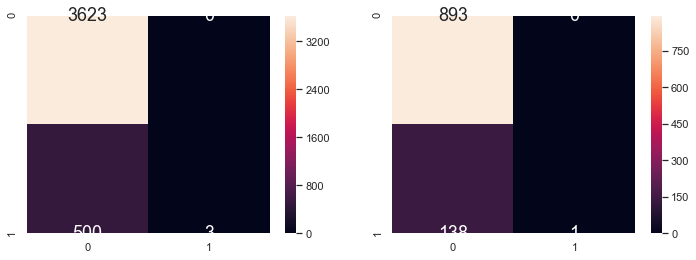

In [25]:
train_acc, train_rates,test_acc,test_rates= forest2()
data2 = [train_acc, train_rates,test_acc,test_rates]
matrix = matrix.append({'model':'forest','train_acc': data2[0], "train_rates": data2[1], 'test_acc': data2[2], 'test_rate': data2[3]},ignore_index= True)

## Comments

Random forest seems to do worse than decision tree. Why is that so? from online sources it seems that random forest is not suitable for cases where there are many dimensions of data sets.

It is also interesting to note that that the number false positive  is 0, which means that there is no misclassification of good words as spam.



## Considering the Length of text

My impression of spam message is usually long/wordy/filled with spaces, while normal text messages are usually pretty short and succint whyy? I think it is because we have limited characters that we can type before it becomes an MMS and we have to pay more for such messages >:(. Lets find out whether my preconceived notion is true.

In [26]:
smsData['text_length'] = smsData['text'].apply(len)
smsData.head()

,label,text,text_length
0,good,"Go until jurong point, crazy.. Available only ...",111
1,good,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,good,U dun say so early hor... U c already then say...,49
4,good,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1AA346F48>,
      dtype=object)

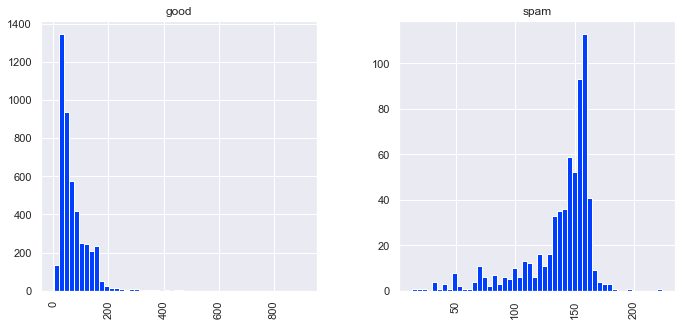

In [27]:
plt.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
smsData.hist(column='text_length', by='label', bins=50,figsize=(11,5))

In [28]:
spam = smsData[smsData['label']=='spam']
good = smsData[smsData['label']=='good']

## Spam Word count vs good word count

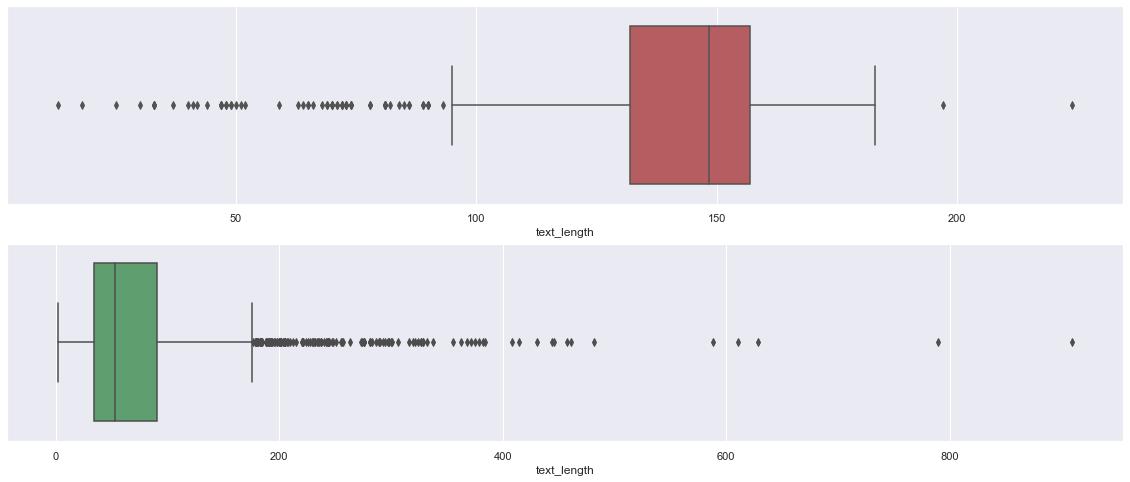

In [29]:
f, axes = plt.subplots(2, 1, figsize = (20, 8))
sb.boxplot(spam['text_length'], orient = "h", color = 'r',ax = axes[0])
sb.boxplot(good['text_length'], orient = "h", color = 'g',ax = axes[1])

Turns out word length is is more much longer for spam messages with most text between the length of about 130 -160
On the other hand good words length is about 40 - 120. It is also interesting to note that the cluster of 'good' text length is more clustered together as seen by the area of the green box. Hence it might be useful for a decision tree to determine whether a text is good or spam. Lets find out..

## Decision tree with new variable word_length

In [30]:
feature = count.get_feature_names()
feature

['0',
 '008704050406',
 '0089my',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '020603',
 '0207',
 '02070836089',
 '02072069400',
 '02073162414',
 '02085076972',
 '020903',
 '021',
 '050703',
 '0578',
 '06',
 '060505',
 '061104',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '071104',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '0784987',
 '0789xxxxxxx',
 '0794674629107880867867',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '084528

In [31]:
word_freq = pd.DataFrame(text_count.toarray(),columns = feature, )
word_freq
sort = True
word_freq['text_length'] = smsData['text_length']

Words and text_length are added together in a dataframe.These variables are used to predict spam and good words.

In [32]:
word_freq

,0,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,...,â€¦thanks,â€œ,â€œharry,â€“,ã©,ã¼,ã¼ll,ãœ,ãœll,text_length
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,111
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,155
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,161
5154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,37
5155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,57
5156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,125


Train Accuracy:  0.9522539990305381
true negative rate =  0.9922715981231024
false positive rate =  0.007728401876897599
false negative rate =  0.3359840954274354
true positive rate =  0.6640159045725647

Test Accuracy:  0.9525193798449613
true negative rate =  0.9944008958566629
false positive rate =  0.005599104143337066
false negative rate =  0.31654676258992803
true positive rate =  0.6834532374100719



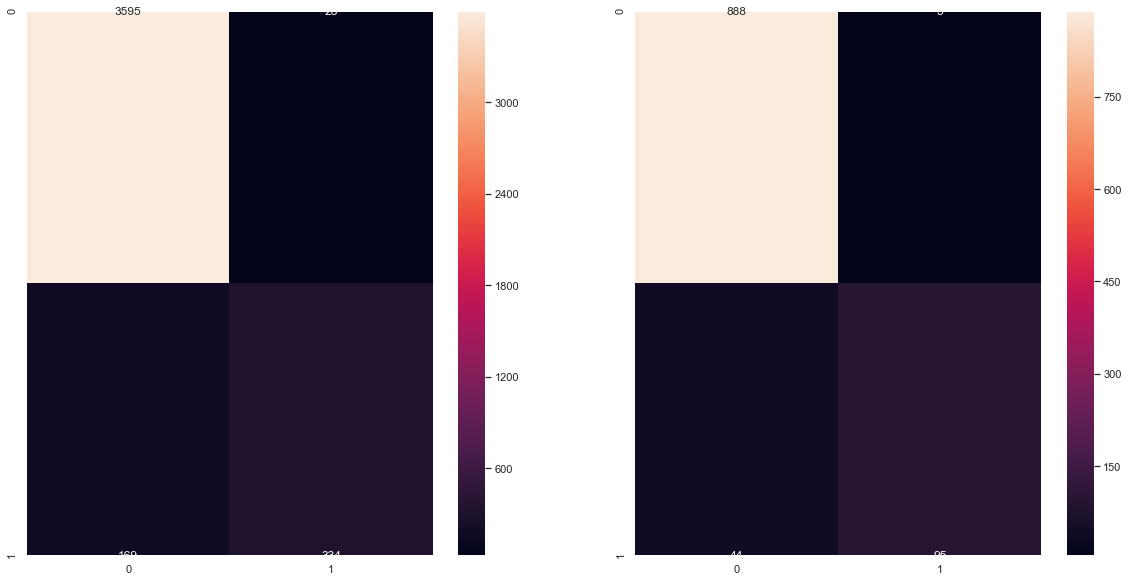

In [33]:
X_train, X_test, y_train, y_test = train_test_split(word_freq, smsData['label'], test_size = 0.20, random_state =0)
train_acc, train_rates,test_acc,test_rates=tree2()
data3 = [train_acc, train_rates,test_acc,test_rates]
matrix = matrix.append({'model':'dectree_textlen','train_acc': data3[0], "train_rates": data3[1], 'test_acc': data3[2], 'test_rate': data3[3]},ignore_index= True)

## Random forest with new variable word_length

Train Classification Accuracy : 0.8841492971400873
true negative rate =  1.0
false positive rate =  0.0
false negative rate =  0.9502982107355865
true positive rate =  0.04970178926441352

Test Classification Accuracy : 0.8701550387596899
true negative rate =  1.0
false positive rate =  0.0
false negative rate =  0.9640287769784173
true positive rate =  0.03597122302158273


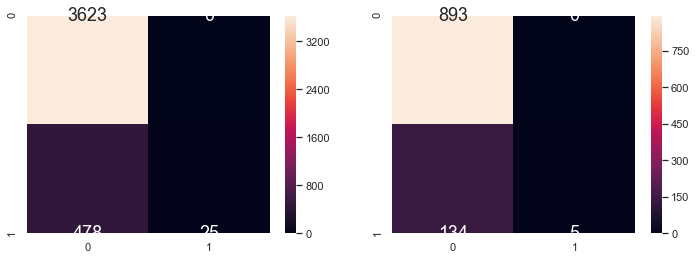

In [34]:
train_acc, train_rates,test_acc,test_rates=forest2()
data4 = [train_acc, train_rates,test_acc,test_rates]
matrix = matrix.append({'model':'forest_textlen','train_acc': data4[0], "train_rates": data4[1], 'test_acc': data4[2], 'test_rate': data4[3]},ignore_index= True)

In [35]:
matrix

,model,train_acc,train_rates,test_acc,test_rate
0,dectree,0.9270,"[0.9859, 0.0141, 0.497, 0.503]",0.9312,"[0.9563, 0.0437, 0.2302, 0.7698]"
1,forest,0.8788,"[[1.0, 0.0, 0.994, 0.006]]",0.8663,"[[1.0, 0.0, 0.9928, 0.0072]]"
2,dectree_textlen,0.9523,"[[0.9923, 0.0077, 0.336, 0.664]]",0.9525,"[[0.9944, 0.0056, 0.3165, 0.6835]]"
3,forest_textlen,0.8841,"[[1.0, 0.0, 0.9503, 0.0497]]",0.8702,"[[1.0, 0.0, 0.964, 0.036]]"


## Comments

With the addition of text length accuracy of Decision tree increased by 0.2%, however it does not really affect Random Forest, In fact it did slighlty worst.

My take on why Random Forest did worse:

Random forest is made up of many different decision tree, each decision tree will give a response on whether a text is good or spam. The larger pool of decision trees in the random forest model may have contributed to a larger pool of errors made during classification. As the random forest model averages out the classification of alldecision trees, the errors it makes will tend to be larger than a single decision tree. Hence, its classification accuracy will tend to be slightly lower.


## Conclusion

Decsion tree with predicitors: tokenize word and text length is the more accurate predictor of text classification. Futher improvement could be to consider tf–idf(frequency–inverse document frequency). Instead of recognizing the most common word that appears in the messages, it also weighs the importance of certain words towards classfying it as spam or good.

In terms of machine learning models, what I have read from different sources Decision trees and Random forest classfication may not be the best model for text classfication. This is because the number of predictors which are involve in the machine learning is too much, there may be a problem of over fitting the data set. A popular model would be Naive Bayes model as it is able to work with higher dimension data sets better.

## Sources

https://www.youtube.com/watch?v=cNLPt02RwF0&t=1301s #usage of countvector, nltk

https://towardsdatascience.com/stemming-lemmatization-what-ba782b7c0bd8 #difference between lemming and stemming

https://www.kaggle.com/ishansoni/sms-spam-collection-dataset #sample solutions 

https://pythonprogramming.net/stemming-nltk-tutorial/ # documenation for lemming stemming etc

https://towardsdatascience.com/decision-tree-and-random-forest-explained-8d20ddabc9dd #pros and cons of random forest class tree. Did not really justify the cons

